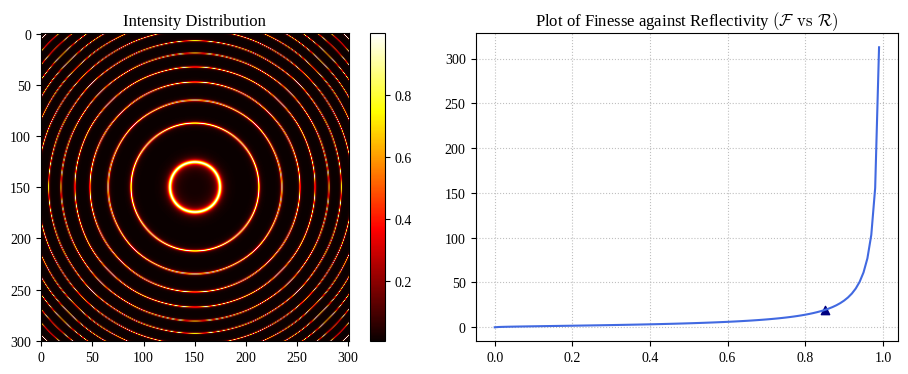

In [73]:
# Preamble
import matplotlib.pyplot as plt
import numpy as np
from LightPipes import nm, mm

# Parameters
labda = 550*nm     # Wavelength
size = 5*mm        # Size of grid
N = 300            # Grid dimension
f = 100*mm         # Lens focal length
r = 0.85           # Reflectivity of mirror
d = 6*mm           # Separation bewteen two mirrors
k = 2*np.pi/labda  # Wavenumber
n = 1.0            # Medium refractive index

# Laser start
F_prime = (4.0 * r) / (1.0 - r)**2       # F'
finesse = (np.pi * np.sqrt(r)) / (1 - r) # Finesse
I = np.ones((N+1, N+1))                  # Normalised intensity (all generated points have equal intensity)
I0 = I[0][0]                             # Obtain initial intensity
step = size / N                          # Iteration step size = 0.0167mm

# This section calculates intensity, I at every point on the grid
indices = np.arange(0, N+1)      # create indices for each point on grid
center_offset = size / 2.0     # centered in the middle, i.e. {x: -size/2.0 <= x <= size/2.0, or -R <= x <= R}
ray_positions = indices * step # 1D axis 
X, Y = np.meshgrid(ray_positions, ray_positions)  # 2D grid 
X = X - center_offset # moving the grid to be centered at (0,0)
Y = Y - center_offset

radius = np.sqrt(X**2 + Y**2)       # otain radius from the center of each point
theta = radius / f                  # Small angle approximation for divergence, theta = tan(theta)
Phi = 2 * k * n * d * np.cos(theta) # Phi angle (round trip)
Inten = 1 / (1 + F_prime * np.sin(Phi/2)**2) # Assuming no loss and T + R = 1
I = I0 * Inten

# Font Customization
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'Liberation Serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['figure.dpi'] = 100

# Create matplotlib figure and axes 
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 1. Plot circular fringes
# ax1.axis('equal')
ax1.set_title('Intensity Distribution')
fringes = ax1.imshow(I, cmap='hot', aspect='equal')
fig.colorbar(fringes, ax=ax1, orientation='vertical', fraction=0.05, pad=0.05)

# 2. Plot finesse graph
R_arr = (np.arange(0, 100, 1)) / 100
F_arr = (np.pi * np.sqrt(R_arr)) / (1 - R_arr)
ax2.plot(R_arr, F_arr, color='royalblue')
ax2.scatter(r, finesse, color='navy', marker='^')
ax2.grid(ls=':', alpha=0.8)
ax2.set_title(r"Plot of Finesse against Reflectivity $(\mathcal{F}\text{ vs }\mathcal{R})$")

plt.show()

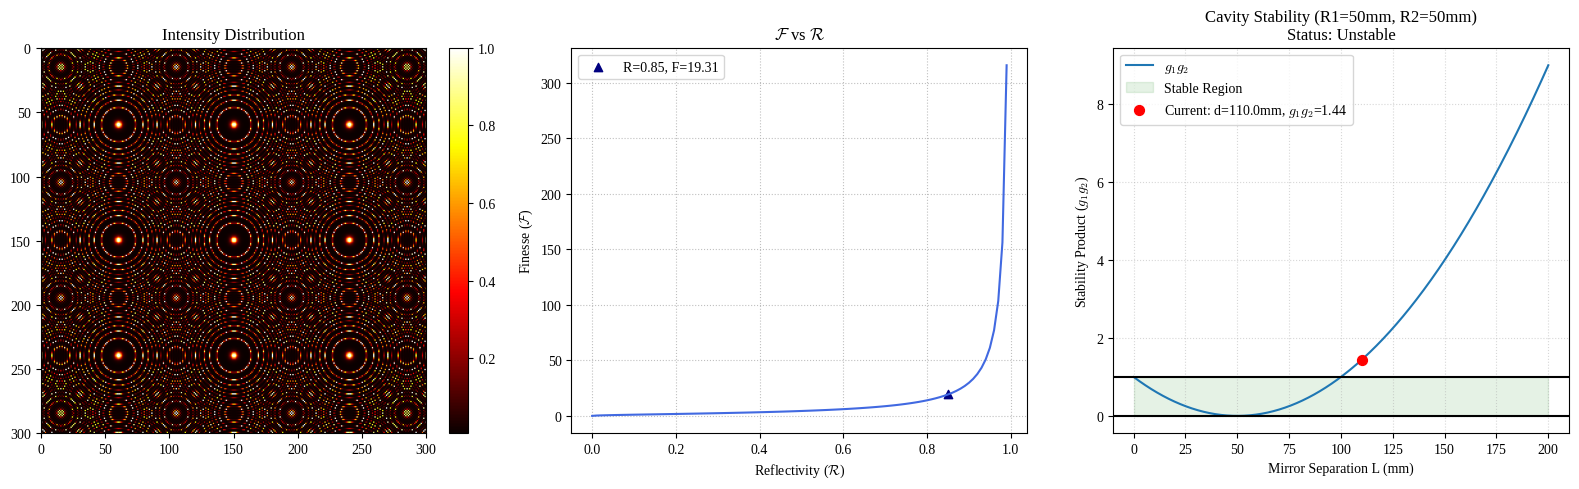

In [72]:
# Preamble
import matplotlib.pyplot as plt
import numpy as np
from LightPipes import nm, mm # Assuming LightPipes constants are available

# --- Parameters ---
labda = 550*nm     # Wavelength
size = 5*mm        # Size of grid
N = 300            # Grid dimension
# f = 100*mm         # [REMOVE] This was for the lens, not the mirror radius
r = 0.85           # Reflectivity of mirror
d = 110*mm           # Separation bewteen two mirrors (L)
k = 2*np.pi/labda  # Wavenumber
n = 1.0            # Medium refractive index

# --- NEW: Cavity Parameters (Assume two mirrors with radius R_1 and R_2) ---
R1 = 50*mm        # Radius of curvature of mirror 1 (R1 = 2*f1)
R2 = 50*mm        # Radius of curvature of mirror 2 (R2 = 2*f2)

# --- NEW: Stability Calculation ---
g1 = 1.0 - (d / R1)
g2 = 1.0 - (d / R2)
g_product = g1 * g2

stability_status = "Stable" if (0 <= g_product <= 1) else "Unstable"

# Laser start (Intensity calculation remains the same for classic FPI formula)
F_prime = (4.0 * r) / (1.0 - r)**2       # F'
finesse = (np.pi * np.sqrt(r)) / (1 - r) # Finesse
I = np.ones((N+1, N+1))                  # Normalised intensity
I0 = I[0][0]                             # Obtain initial intensity
step = size / N                          # Iteration step size

# This section calculates intensity, I at every point on the grid
indices = np.arange(0, N+1)
center_offset = size / 2.0
ray_positions = indices * step
X, Y = np.meshgrid(ray_positions, ray_positions)
X = X - center_offset
Y = Y - center_offset

radius = np.sqrt(X**2 + Y**2)
# NOTE: The intensity formula depends on theta, the angle of incidence.
# This angle is usually measured relative to the normal of the mirror.
# For a planar FPI, we define theta = radius / focal_length_of_VIEWING_LENS
# If R1=R2=infinity (planar mirrors), the cavity is stable (g_product=1). 
# If R1 and R2 are finite, the intensity distribution is more complex (Gaussian modes), 
# but we stick to the classic angular dependence for visualization.
f_viewing_lens = 100*mm # Re-introduce the lens focal length for angle calculation
theta = radius / f_viewing_lens # Small angle approximation
Phi = 2 * k * n * d * np.cos(theta) # Phi angle (round trip)
Inten = 1 / (1 + F_prime * np.sin(Phi/2)**2) # Assuming no loss and T + R = 1
I = I0 * Inten

# Font Customization
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'Liberation Serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['figure.dpi'] = 100

# Create matplotlib figure and axes
fig = plt.figure(figsize=(16, 5)) # Wider figure for three plots
ax1 = fig.add_subplot(1, 3, 1) # Intensity Distribution
ax2 = fig.add_subplot(1, 3, 2) # Finesse Plot
ax3 = fig.add_subplot(1, 3, 3) # Stability Plot

# 1. Plot circular fringes
ax1.set_title('Intensity Distribution')
fringes = ax1.imshow(I, cmap='hot', aspect='equal')
fig.colorbar(fringes, ax=ax1, orientation='vertical', fraction=0.08, pad=0.05)

# 2. Plot finesse graph
R_arr = (np.arange(0.01, 100, 1)) / 100 # Start R at 0.01 to avoid division by zero
F_arr = (np.pi * np.sqrt(R_arr)) / (1 - R_arr)
ax2.plot(R_arr, F_arr, color='royalblue')
ax2.scatter(r, finesse, color='navy', marker='^', label=f'R={r}, F={finesse:.2f}')
ax2.grid(ls=':', alpha=0.8)
ax2.set_xlabel(r'Reflectivity ($\mathcal{R}$)')
ax2.set_ylabel(r'Finesse ($\mathcal{F}$)')
ax2.set_title(r"$\mathcal{F}$ vs $\mathcal{R}$")
ax2.legend()

# 3. Plot Stability Condition (g1 g2 vs L)
L_arr = np.linspace(0.1*mm, 200*mm, 500) # Range of possible mirror separations
g1_arr = 1.0 - (L_arr / R1)
g2_arr = 1.0 - (L_arr / R2)
g_product_arr = g1_arr * g2_arr

ax3.plot(L_arr/mm, g_product_arr, label=r'$g_1 g_2$')
ax3.fill_between(L_arr/mm, 0, 1, color='green', alpha=0.1, label='Stable Region')
ax3.axhline(y=0, color='k', linestyle='-')
ax3.axhline(y=1, color='k', linestyle='-')
ax3.scatter(d/mm, g_product, color='red', marker='o', s=50, zorder=5, label=f'Current: d={d/mm:.1f}mm, $g_1 g_2$={g_product:.2f}')

ax3.set_xlabel('Mirror Separation L (mm)')
ax3.set_ylabel(r'Stability Product ($g_1 g_2$)')
ax3.set_title(f'Cavity Stability (R1={R1/mm:.0f}mm, R2={R2/mm:.0f}mm)\nStatus: {stability_status}')
ax3.legend()
ax3.grid(ls=':', alpha=0.5)

plt.tight_layout()
plt.show()